In [1]:
import scipy.stats as sista
import scipy.io as sio
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from statsmodels.stats.multitest import multipletests  # ADDED BY HJ

import pingouin as pg 

/opt/homebrew/Caskroom/miniforge/base/envs/accel/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
matplotlib.rcParams['font.sans-serif'] = "Helvetica"
matplotlib.rcParams['font.family'] = "sans-serif"
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

In [3]:
# colors
color_ss2s = np.divide([107,174,214],255)
color_ss2d = np.divide([8,81,156],255)
color_ss4s = np.divide([158,154,200],255)
color_ss4d = np.divide([84,39,143],255)

# mid blue
color_ss2 = np.divide([58,128,185],255)
# mid purple
color_ss4 = np.divide([121,97,172],255)

# black
color_s = np.divide([253,190,133],255)
color_d = np.divide([217,71,1],255)
color_gen = np.divide([253,141,60],255)

In [4]:
thisColor1 = color_s
thisColor2 = color_d

thisLabel1 = 'Same'
thisLabel2 = 'Different'

conds1 = 'ss2s_ss4s_exp1'
theseLabels1 = ['2 Same','4 Same']
data1 = sio.loadmat(conds1+'.mat')
acc1 = data1['acc']
acc_shuff1 = data1['acc_shuff']
conf_mat1 = data1['conf_mat']

conds2 = 'ss2d_ss4d_exp1'
theseLabels2 = ['2 Different','4 Different']
data2 = sio.loadmat(conds2+'.mat')
acc2 = data2['acc']
acc_shuff2 = data2['acc_shuff']
conf_mat2 = data2['conf_mat']

num_cs = np.size(conf_mat1,3)
nsubj = np.size(acc1,0)

#trial timing
t0 = -400
te = 1551
time_window = 50 #bin width
time_step = 25 #bin offset (if smaller than tw, will have overlap)
samples = np.arange(t0,te,2)
sample_step = samples[1]-samples[0]
t = samples[0:samples.shape[0]-int(time_window/sample_step)+1:int(time_step/sample_step)]

In [5]:
#calculate accuracy
#average across folds
acc_all1 = np.mean(acc1,2)
acc_all2 = np.mean(acc2,2)
#average across subjects and find SEM for error bars
acc_mean1 = np.mean(acc_all1,0)
acc_mean2 = np.mean(acc_all2,0)
se1 = sista.sem(acc_all1,0)
se2 = sista.sem(acc_all2,0)
upper_bound1, lower_bound1 = acc_mean1 + se1, acc_mean1 - se1
upper_bound2, lower_bound2 = acc_mean2 + se2, acc_mean2 - se2

#calculate shuffled accuracy
#average across folds
acc_all_shuff1 = np.mean(acc_shuff1,2)
acc_all_shuff2 = np.mean(acc_shuff2,2)
#average across subjects and find SEM for error bars
acc_mean_shuff1 = np.mean(acc_all_shuff1,0)
acc_mean_shuff2 = np.mean(acc_all_shuff2,0)
se_shuff1 = sista.sem(acc_all_shuff1,0)
se_shuff2 = sista.sem(acc_all_shuff2,0)

upper_bound_shuff1, lower_bound_shuff1 = acc_mean_shuff1 + se_shuff1, acc_mean_shuff1 - se_shuff1
upper_bound_shuff2, lower_bound_shuff2 = acc_mean_shuff2 + se_shuff2, acc_mean_shuff2 - se_shuff2

#calculate recall from confusion matrix
#sum across folds
conf_mat_all1 = np.sum(conf_mat1,2)
conf_mat_all2 = np.sum(conf_mat2,2)
#sum across subjects
conf_mat_sum1 = np.sum(conf_mat_all1,0)
conf_mat_sum2 = np.sum(conf_mat_all2,0)

In [6]:
#chance performance based on number of conditions
chance = 1/num_cs
#sig_y = chance+(chance*.25)
chance_text_y = .2

#ylim = [chance-(chance*.5),chance+(chance*.75)]
#ylim = [chance-(chance*.25),chance+(chance*.75)]
ylim = [chance-(chance*.5),chance+(chance*1)]
stim_lower = ylim[0]
stim_upper = ylim[1]
# where to place significance boxes relative to ylims
sig_y1 = ylim[1]-((ylim[1]-ylim[0])/50)
sig_y2 = ylim[1]-((ylim[1]-ylim[0])/15)
print(sig_y1)
print(sig_y2)

0.985
0.95


In [7]:
# ADDED BY HJ - Significance testing w/ FDR correction for multiple comparisons, rather than cluster based testing

pvals1 = sista.ttest_rel(acc_all1,acc_all_shuff1,axis=0).pvalue
_, corrected_p1, _, _ = multipletests(pvals1, method='fdr_bh')
sig_idx1 = corrected_p1 < .05

pvals2 = sista.ttest_rel(acc_all2,acc_all_shuff2,axis=0).pvalue
_, corrected_p2, _, _ = multipletests(pvals2, method='fdr_bh')
sig_idx2 = corrected_p2 < .05

In [8]:
pg.ttest(acc_all1[:, (t > 650) & (t < 1450)].mean(1),acc_all_shuff1[:, (t > 650) & (t < 1450)].mean(1), paired=True)

/opt/homebrew/Caskroom/miniforge/base/envs/accel/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/opt/homebrew/Caskroom/miniforge/base/envs/accel/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,8.997839,9,two-sided,0.000009,"[0.17, 0.28]",4.087207,2370.287,1.0


In [9]:
pg.ttest(acc_all2[:, (t > 650) & (t < 1450)].mean(1),acc_all_shuff2[:, (t > 650) & (t < 1450)].mean(1), paired=True)

/opt/homebrew/Caskroom/miniforge/base/envs/accel/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/opt/homebrew/Caskroom/miniforge/base/envs/accel/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,6.673321,9,two-sided,0.000091,"[0.13, 0.26]",3.023797,308.627,1.0


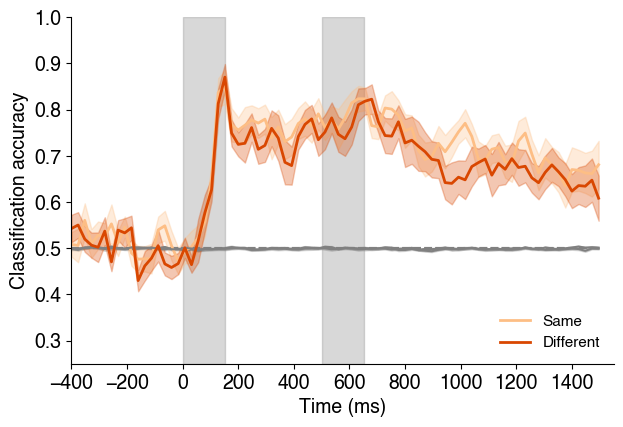

Mean delay accuracy same: 0.7178637500000008
Mean delay S.D. same: 0.04576238828322935
Mean delay accuracy diff: 0.6874285648148155
Mean delay S.D. diff: 0.05104566602041793


In [10]:
# plotting
matplotlib.rcParams['figure.figsize'] = [7, 4.5]

ax = plt.subplot(111)


stim_time1 = [0,151]
stim_time2 = [500,651]

# stim timing shading
ax.fill_between(stim_time1,[stim_lower,stim_lower],[stim_upper,stim_upper],color='gray',alpha=.3)
ax.plot(t,np.ones((len(t)))*chance,'--',color='gray')
ax.fill_between(stim_time2,[stim_lower,stim_lower],[stim_upper,stim_upper],color='gray',alpha=.3)
ax.plot(t,np.ones((len(t)))*chance,'--',color='gray')

# error bars
ax.fill_between(t,upper_bound_shuff1,lower_bound_shuff1, alpha=.3,color='gray')
ax.plot(t,acc_mean_shuff1,color='gray')
ax.fill_between(t,upper_bound1,lower_bound1, alpha=.3,color=thisColor1)
ax.plot(t,acc_mean1,color=thisColor1,linewidth=2,label = thisLabel1)

ax.fill_between(t,upper_bound_shuff2,lower_bound_shuff2, alpha=.3,color='gray')
ax.plot(t,acc_mean_shuff2,color='gray')
ax.fill_between(t,upper_bound2,lower_bound2, alpha=.3,color=thisColor2)
ax.plot(t,acc_mean2,color=thisColor2,linewidth=2,label = thisLabel2)

# significance boxes
# sig_timepoints1 = t[sig_idx1]
# plt.scatter(sig_timepoints1, np.ones(sum(sig_idx1))*(sig_y1),
#                             marker='s', s=28, color=thisColor1, label='p < .05')
# print(f'Significant timepoints same: {sig_timepoints1}')
# sig_timepoints2 = t[sig_idx2]
# plt.scatter(sig_timepoints2, np.ones(sum(sig_idx2))*(sig_y2),
#                                 marker='s', s=28, color=thisColor2, label='p < .05')
# print(f'Significant timepoints diff: {sig_timepoints2}')

# aesthetics
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks(np.arange(.1,1.1,.1))
ax.set_xticks(np.arange(-400,1551,200))
#ax.set_xticklabels(x) 
plt.setp(ax.get_xticklabels(), fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=14)
plt.xlim(-400,1551)
plt.ylim(ylim)

plt.legend(loc='lower right',frameon=False,fontsize=11)

# labelling
plt.xlabel('Time (ms)', fontsize=14)
plt.ylabel('Classification accuracy', fontsize=14)
#ax.text(0.875, chance_text_y, 'Shuffle', transform=ax.transAxes, fontsize=14,
        #verticalalignment='top', color='grey')
plt.savefig('figure_'+conds1+'_and_'+conds2+'.svg',bbox_inches='tight',dpi = 1000,format='svg')
plt.show()

delay_period_acc1 = np.mean(acc_mean1[t>651])
delay_period_sd1 = np.std(acc_mean1[t>651])
delay_period_acc2 = np.mean(acc_mean2[t>651])
delay_period_sd2 = np.std(acc_mean2[t>651])

print(f'Mean delay accuracy same: {delay_period_acc1}')
print(f'Mean delay S.D. same: {delay_period_sd1}')
print(f'Mean delay accuracy diff: {delay_period_acc2}')
print(f'Mean delay S.D. diff: {delay_period_sd2}')
